**<u>Part 1. Dataset Selection and Introduction<u>**

For the purposes of our research, we have chosen a dataset of futures prices for various commodities. We selected five items from the available set, chosen for their economic relevance and sectoral diversity. The data covers the period from January 1, 2000 to August 4, 2023. This 23-year period is able to capture macroeconomic cycles, geopolitical and energy disruptions, as well as structural changes such as the ecological transition. These options guarantee a broad enough historical scope to examine underlying trends, sector fluctuations and possible correlations between these commodities. 

**Time Series Selection:**

Commodities Time Series Dataset, focusing on Natural Gas, Gold, Brent Crude, Aluminium, and Wheat. The dataset is sourced from Kaggle.
https://www.kaggle.com/datasets/debashish311601/commodity-prices?resource=download&fbclid=IwY2xjawKaVC9leHRuA2FlbQIxMQABHoo5UK37gCDceKlDPNQ8c4CXTAe-aBWcXQDX5kF0lQCsyT9-MOnST2FfK4ET_aem_P6Shr3v-1MeuxD-P7QSf8g

These commodities are key indicators of global economic health: 

- **Natural Gas** reflects energy supply/demand dynamics and seasonality.  

- **Gold** is a defensive asset, sensitive to inflation and geopolitical risks.  

- **Brent Crude** represents global oil prices and consumptions, vital for inflation and growth forecasts. 

- **Aluminium** is crucial in manufacturing and construction.  

- **Wheat** prices affect global food security.  

**Volatility and Forecastability**: Commodities exhibit strong seasonality, high volatility, and complex correlations, making them ideal for:  

- **Anomaly detection** (geopolitical or political disruptions)  

- **Forecasting** (cyclicality, patterns demand/supply trends using time series models)  

- **Cross-Asset Analysis Potential**: The dataset allows for studying relationships (correlations, how oil shocks impact gold or wheat) and looking at potential risks. 

 

The Kaggle platform features a database of futures prices for various commodities, analyzed by a seasoned financial quant. 


In [1]:
import pandas as pd

# First we import our data set
df = pd.read_csv("commodity_futures.csv")

# Then we only keep the dates, and the floowing commodities : Natural Gas, Gold, Brent Crude, Aluminium and Wheat
commodities_kept = ['Date', 'NATURAL GAS', 'GOLD', 'BRENT CRUDE', 'ALUMINIUM', 'WHEAT']
df_cleaned = df[commodities_kept].copy()

#To clean our dataset we will delete all the lines of the excel
df_cleaned = df_cleaned.dropna()

# Finally, we will print the first lines of our data set to verify if everything worked
print(df_cleaned.head())

# We convert the 'Date' column into datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# We set the 'Date' column as the index of our DataFrame
df_cleaned.set_index('Date', inplace=True)

         Date  NATURAL GAS   GOLD  BRENT CRUDE  ALUMINIUM   WHEAT
1  2000-01-04        2.176  283.7        24.39    1617.50  247.25
2  2000-01-05        2.168  282.1        23.73    1636.50  249.75
3  2000-01-06        2.196  282.4        23.62    1639.75  248.50
4  2000-01-07        2.173  282.9        23.09    1652.00  251.75
5  2000-01-10        2.216  282.7        23.73    1636.75  253.50


**<u>Part 2. Detailed Dataset Analysis<u>**

1. **Price evolution of selected commoditities between 2000 and 2023**

We created a Python code to visualize the price evolution of each asset. The objective is to use plt function and to look at the evolution of all commodities in USD. 

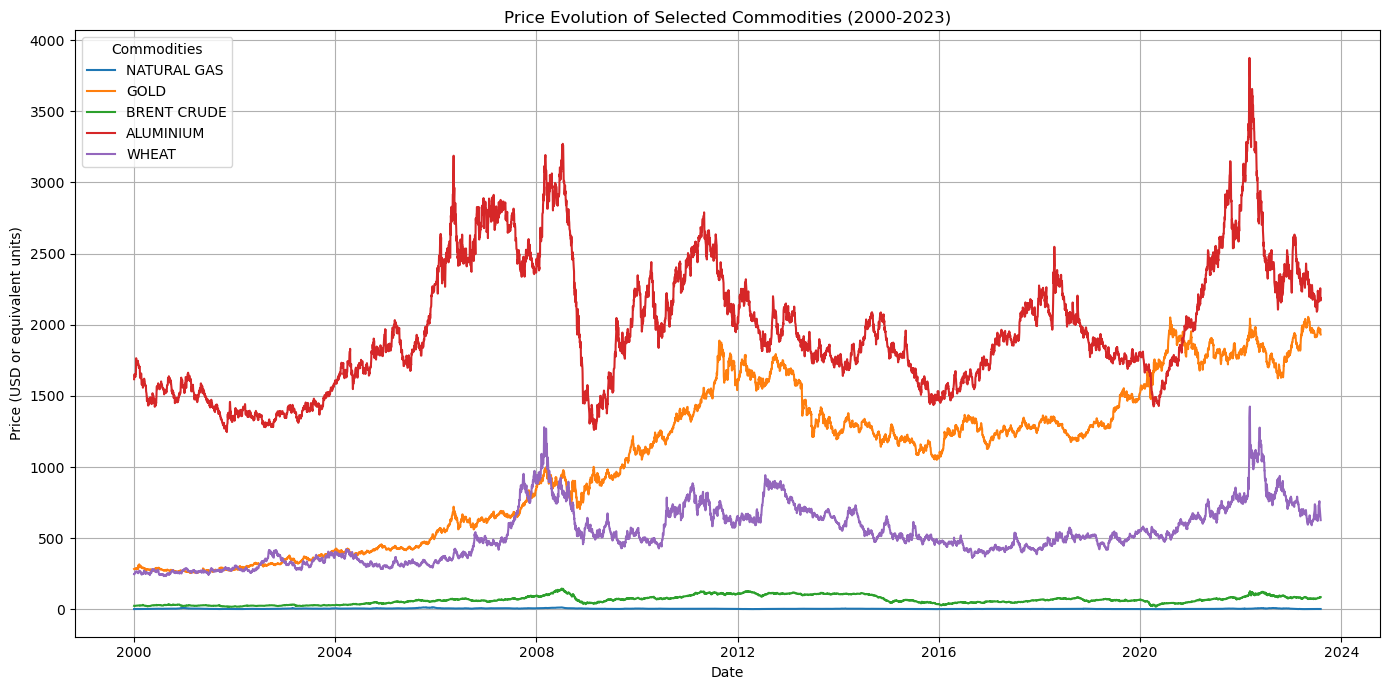

In [2]:
#1. Price evolution of selected commoditities between 2000 and 2023

import matplotlib.pyplot as plt 

# We create a visualisation of the price evolution of the 5 selected commodities
plt.figure(figsize=(14, 7))
for col in ['NATURAL GAS', 'GOLD', 'BRENT CRUDE', 'ALUMINIUM', 'WHEAT']:
    plt.plot(df_cleaned.index, df_cleaned[col], label=col)

plt.title("Price Evolution of Selected Commodities (2000-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD or equivalent units)")
plt.legend(title="Commodities")
plt.grid(True)
plt.tight_layout()
plt.show()


Looking at the chart, aluminum clearly appears to be the most volatile asset. The sharp drop around day 2200 corresponds to the 2008 financial crisis and the resulting economic slowdown. A similar pattern can be observed around day 5200 during the Covid-19 pandemic. 

Gold, on the other hand, has shown a steady upward trend, reflecting its role as a defensive and safe-haven investment. Its price reached $3,400 in 2025. 

Wheat, like Brent crude, follows a cyclical pattern, with notable downturns in 2008 and 2020. Interestingly, it appears to be negatively correlated with aluminum. 

2. **Normalized price evolution of selected commodities to start at 100**

We created a Python code to visualize the price evolution of each asset from a base 100. The objective is to use plt function and to look at the evolution of all prices of these commodities.

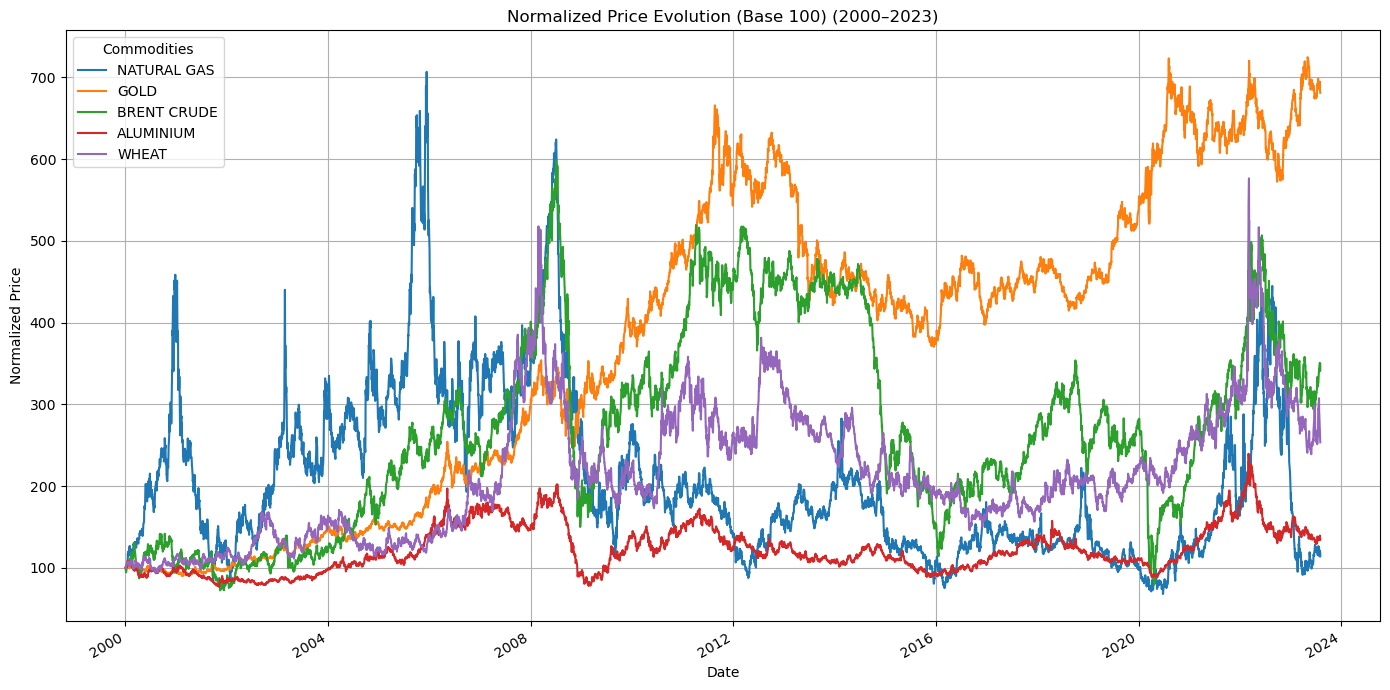

In [3]:
#2. Normalized price evolution of selected commodities to start at 100

# First, we select only numeric values in the cleaned database
df_numeric = df_cleaned.select_dtypes(include='number')

# Then, we normalize the initial prices to a base of 100
df_normalized = df_numeric / df_numeric.iloc[0] * 100

# We keep the same date index for proper plotting
df_normalized.index = df_cleaned.index

# Finally, we create a visualisation of the price evolution (base 100) of the 5 selected commodities
df_normalized.plot(figsize=(14, 7), title="Normalized Price Evolution (Base 100) (2000–2023)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.grid(True)
plt.legend(title="Commodities")
plt.tight_layout()
plt.show()

Natural Gas: Highly volatile, with sharp price spikes followed by rapid declines. This reflects its sensitivity to geopolitical shocks and its strong cyclical nature. 

Brent Crude: Displays a clear cyclical pattern. Prices surged before the 2008 crisis and again before Covid-19, followed by significant crashes. Its performance is closely tied to global energy demand and macroeconomic cycles. 

Aluminum: Prices closely follow industrial activity, showing strong correlation with global production and infrastructure development. The overall trend is upward. 

Wheat: Relatively stable between 2000 and 2020, with notable exceptions during the 2008 crisis and the Covid-19 pandemic. Recent price increases are likely linked to supply chain disruptions caused by the war in Ukraine. 

Gold: Serves as a defensive asset and a hedge against uncertainty, consistently increasing in value during periods of market stress. 

3. **Analysis of the volatility of the selected commodities**

Now we want to visualize with a plot the volatility on a 30-day rolling basis of each of the selected commodities

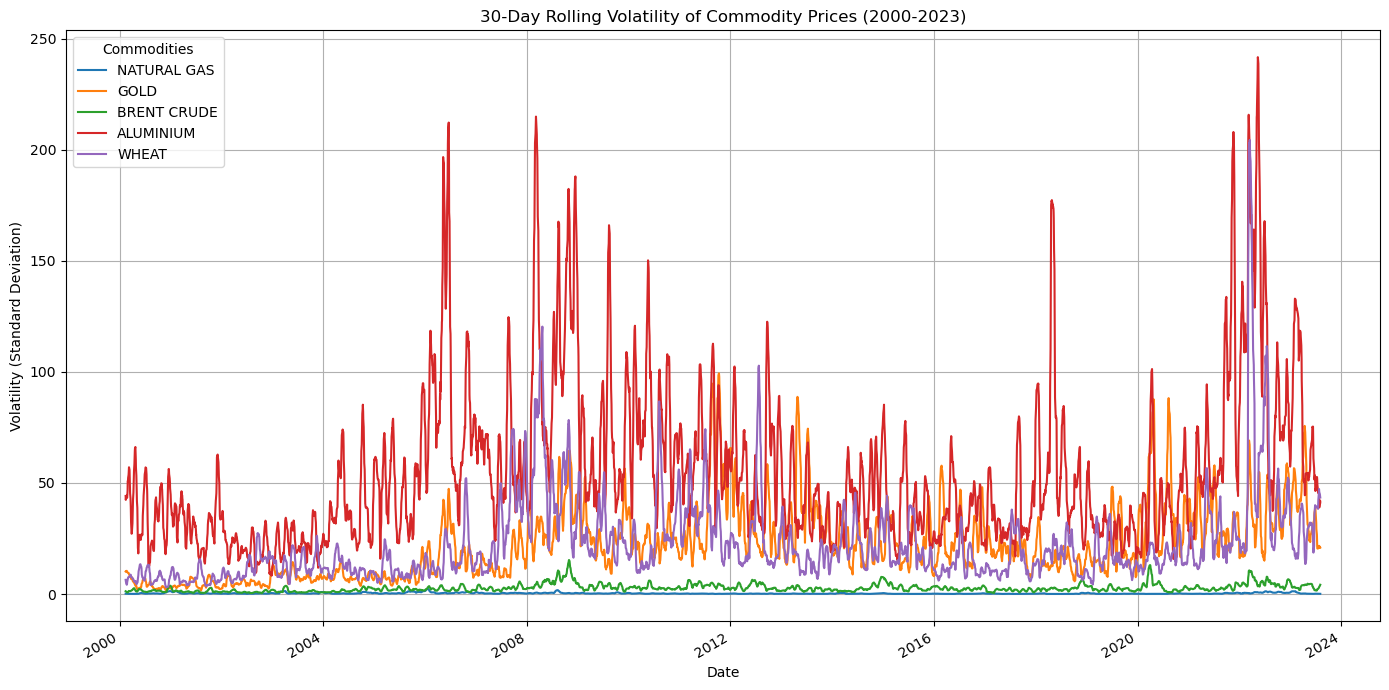

In [4]:
# 3. Analysis of the volatility of the selected commodities (30-day rolling basis)

# First, we compute the rolling volatility on a 30-day rolling basis
volatility = df_cleaned.rolling(window=30).std()

# Finally, we create a visualisation of the rolling volatility (30-day) of the 5 selected commodities
volatility.plot(
    figsize=(14, 7),
    title="30-Day Rolling Volatility of Commodity Prices (2000-2023)"
)
plt.xlabel("Date")
plt.ylabel("Volatility (Standard Deviation)")
plt.grid(True)
plt.legend(title="Commodities")
plt.tight_layout()
plt.show()

Aluminum is clearly the most volatile commodity, with volatility frequently exceeding 150–200. This highlights its sensitivity to market instability and reactivity to global industrial dynamics. 

Wheat also exhibits high volatility, largely driven by periods of stress and uncertainty linked to supply chain disruptions and geopolitical risks — notably in 2006, 2008, 2018, and 2022. 

Gold shows moderate volatility, often influenced by futures trading activity among financial professionals. However, its role as a long-term hedge generally tempers extreme fluctuations. 

Crude Oil and Natural Gas display comparatively lower volatility, reflecting their status as essential energy commodities with more stable long-term demand, despite occasional geopolitical shocks. 

4. **Monthly volatility heatmap of selected commodities**

We think that it is interesting to try to see if there is a seasonnality in the volatility of these commodities. We can visualize this seasonnality with a heatmap swhowing in which month, each commodity is the most volatile

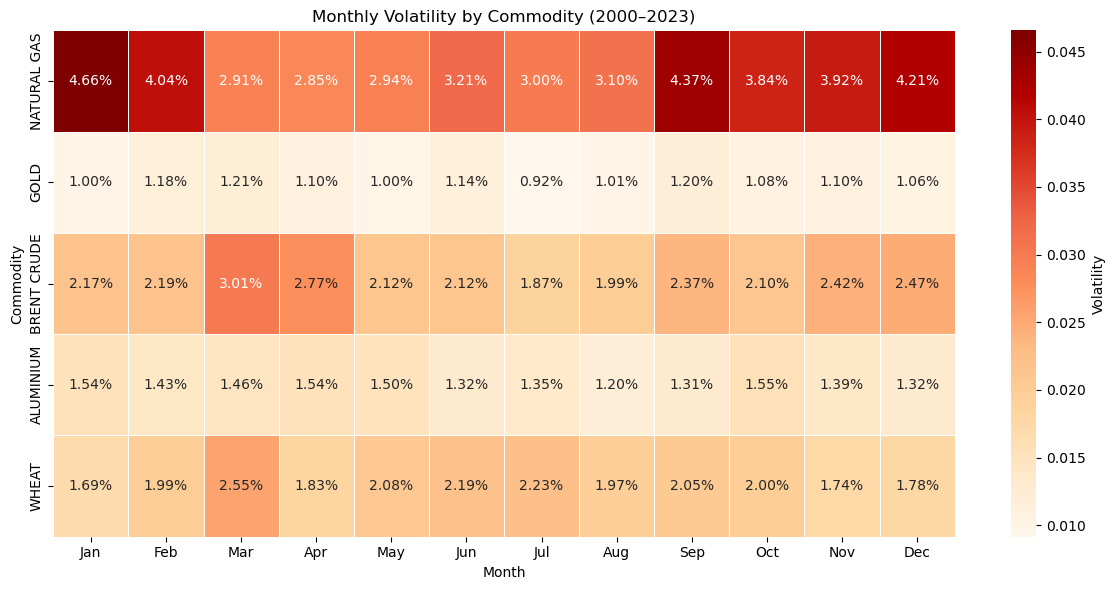

In [5]:
# 4. Monthly volatility heatmap of selected commodities

import seaborn as sns
import matplotlib.pyplot as plt

# First, we select only numeric values in the cleaned database (with correct datetime index)
df_numeric = df_cleaned.select_dtypes(include='number')

# Then, we compute daily returns
returns = df_numeric.pct_change().dropna()

# We add a "Month" column based on the datetime index
returns['Month'] = returns.index.month

# Next, we compute monthly volatility (standard deviation of daily returns per month)
monthly_vol = returns.groupby('Month').std().T

# Replace numeric month index with month names (abbreviated)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_vol.columns = [month_names[m-1] for m in monthly_vol.columns]

# Finally, we create a visualisation of the heatmap of the monthly volatility for each commodity
plt.figure(figsize=(12, 6))
sns.heatmap(
    monthly_vol,
    annot=True,
    fmt=".2%",
    cmap="OrRd",
    linewidths=0.5,
    cbar_kws={"label": "Volatility"}
)
plt.title("Monthly Volatility by Commodity (2000–2023)")
plt.xlabel("Month")
plt.ylabel("Commodity")
plt.tight_layout()
plt.show()

Natural Gas: Volatility tends to peak in January and late Q4, following a consistent seasonal pattern driven by increased demand during colder temperatures. 

Gold: Among the most stable commodities, gold exhibits low volatility over time. It functions primarily as a macroeconomic hedge, offering protection in times of uncertainty. 

Brent Crude: Shows elevated volatility in Q1 and Q2, often linked to OPEC meetings and production announcements. However, overall volatility remains consistently high due to its sensitivity to geopolitical and macroeconomic developments. 

Aluminum: Relatively low volatility in recent periods, suggesting more stable market expectations and reduced short-term fluctuations in industrial demand. 

Wheat: Shows seasonal volatility, with notable peaks around March, June, and July corresponding to planting and harvesting periods. Volatility tends to decline in Q3 and Q4 due to lower trading volumes. 

5. **Correlation matrix of the prices**

Our last visualization regards the correlation between the evolution of the price of these commodities. We create another heatmap to have a clear idea of how each commodity change with the other.

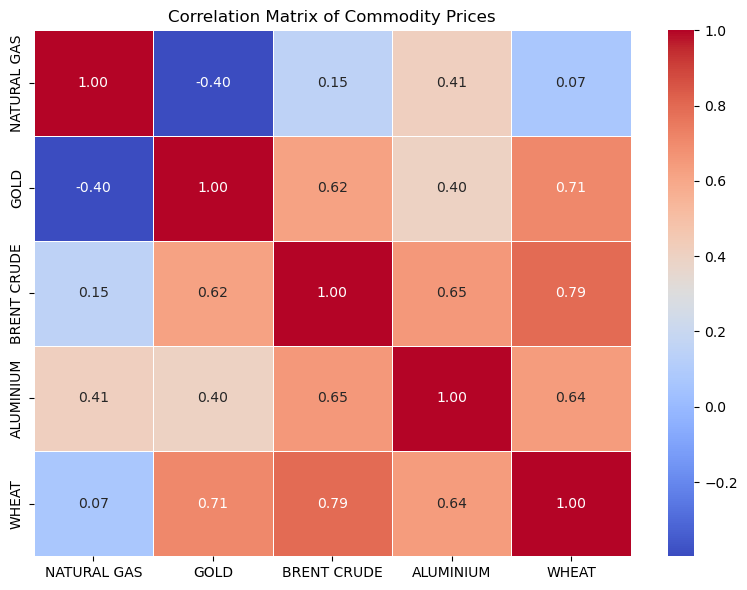

In [6]:
# 5. Correlation matrix of the prices

import seaborn as sns
import matplotlib.pyplot as plt

# First, we compute the correlation matrix on numeric columns only
corr_matrix = df_cleaned.select_dtypes(include='number').corr()

# Finally, we create a visualisation of the correlation matrix of commodity prices 
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Commodity Prices")
plt.tight_layout()
plt.show()

Natural Gas: Negatively correlated with Gold, because natural gas reacts to industry and energy shocks. It is thus correlated to aluminum. No correlation to Brent Crude / Wheat due to independence.  

Gold: Positively correlated to wheat and crude. It is surprising... but reflects inflationary pressures.  

Brent Crude: High correlation with Wheat and Aluminum (inflation, demand) or gold (macro shocks). Low with Natural Gas (different behavior).  

Aluminum and Wheat: Positive correlation (0.64) die to consistent industrial and industrial demand / growth. 

6. **Summary table**

Finally, we want to create a summary table, summarizing for each commodity, the month with the best returns, with the lowest volatility and the suggested month to buy each commodity.
To suggest the best month to buy each commodity, we suggest the month just befor the month with the higher historical returns to benefit from the best returns in the next month.

In [7]:
# 6. Summary table

# First, we compute the mean of monthly returns
monthly_returns = returns.groupby('Month').mean().T

# Then, we identify the key months for each commodity
best_returns_month = monthly_returns.idxmax(axis=1)
min_vol_month = monthly_vol.idxmin(axis=1)
suggested_buy_month = best_returns_month.apply(lambda x: 12 if x == 1 else x - 1)

# Next, we associate each month to a number for the mapping
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Thereafter, we extract corresponding values
best_return_value = [
    monthly_returns.loc[commodity, month] * 100
    for commodity, month in zip(monthly_returns.index, best_returns_month)
]

min_vol_value = [
    monthly_vol.loc[commodity, month] * 100
    for commodity, month in zip(monthly_vol.index, min_vol_month)
]

# Finally, we create a table
summary_table = pd.DataFrame({
    'Best Return Month': best_returns_month.map(month_names),
    'Average Return (%)': best_return_value,
    'Lowest Volatility Month': min_vol_month.map(month_names),
    'Average Volatility (%)': min_vol_value,
    'Suggested Buy Month': suggested_buy_month.map(month_names)
}, index=monthly_returns.index)
summary_table[['Average Return (%)', 'Average Volatility (%)']] = summary_table[
    ['Average Return (%)', 'Average Volatility (%)']
].round(2)

print(summary_table)

            Best Return Month  Average Return (%) Lowest Volatility Month  \
NATURAL GAS               Sep                0.37                     NaN   
GOLD                      Jan                0.11                     NaN   
BRENT CRUDE               Feb                0.25                     NaN   
ALUMINIUM                 Jan                0.11                     NaN   
WHEAT                     Jul                0.17                     NaN   

             Average Volatility (%) Suggested Buy Month  
NATURAL GAS                    2.85                 Aug  
GOLD                           0.92                 Dec  
BRENT CRUDE                    1.87                 Jan  
ALUMINIUM                      1.20                 Dec  
WHEAT                          1.69                 Jun  


**<u>Part 3. Consulting Scenario – Business Questions<u>**

**Question 1 : Anomaly Detection**

**Client Context:**

Two former executives of the American hedge fund Millennium have decided to launch a new investment fund dedicated replicate commodity markets to exploiting and detecting market anomalies in the commodities sector. They want to develop an algorithmic tool that will enable them to anticipate unexpected price movements on these markets, in order to limit their losses or maximise their gains. To do this, they need an in-depth analysis of historical anomalies on a selection of commodities in order to base their tool on these anomalies. 
They therefore call in a consultancy specialising in time series analysis, which will be tasked with documenting the main periods of anomalies observed since the early 2000s. 

**Case Question:**

Can you identify the main historical anomalies for the following five commodities: Natural Gas, gold, Brent Crude Oil, Aluminium and Wheat?

**Introduction:**

For each of the commodity futures, we are going to try to detect anomalies using a matrix profile over 30-day subsequences, in order to have a wide time range given the amount of data we have (23 years of daily data).

We will first look at the longest Euclidean distance to find the main anomaly and when it occurs, and then look at the 5 most important anomalies for each commodity. And try to understand what caused these anomalies (the 2008 crisis, Covid 19, the war in Ukraine, etc.).

1. **Natural Gas**

The discord is located at index 4574, which corresponds to the date: 2017-09-25


/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/1072282280.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


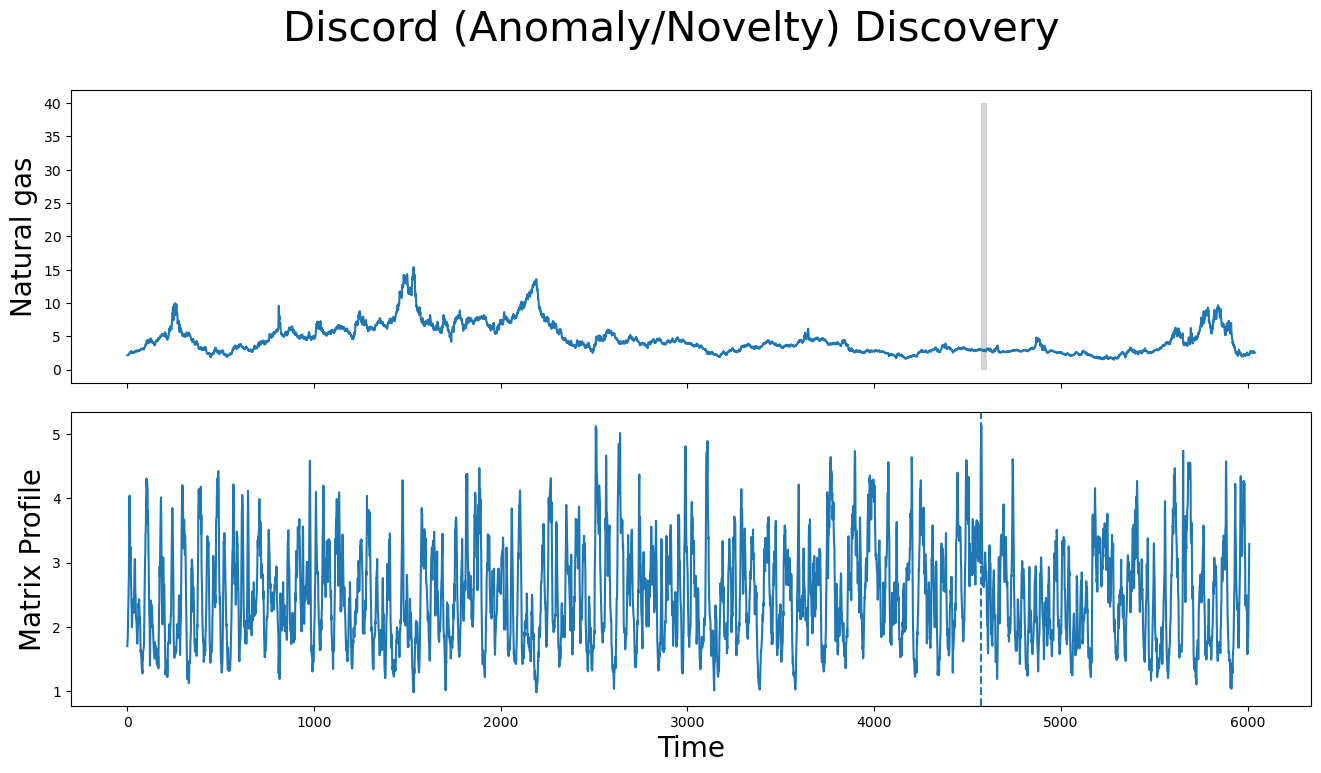

/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/1072282280.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


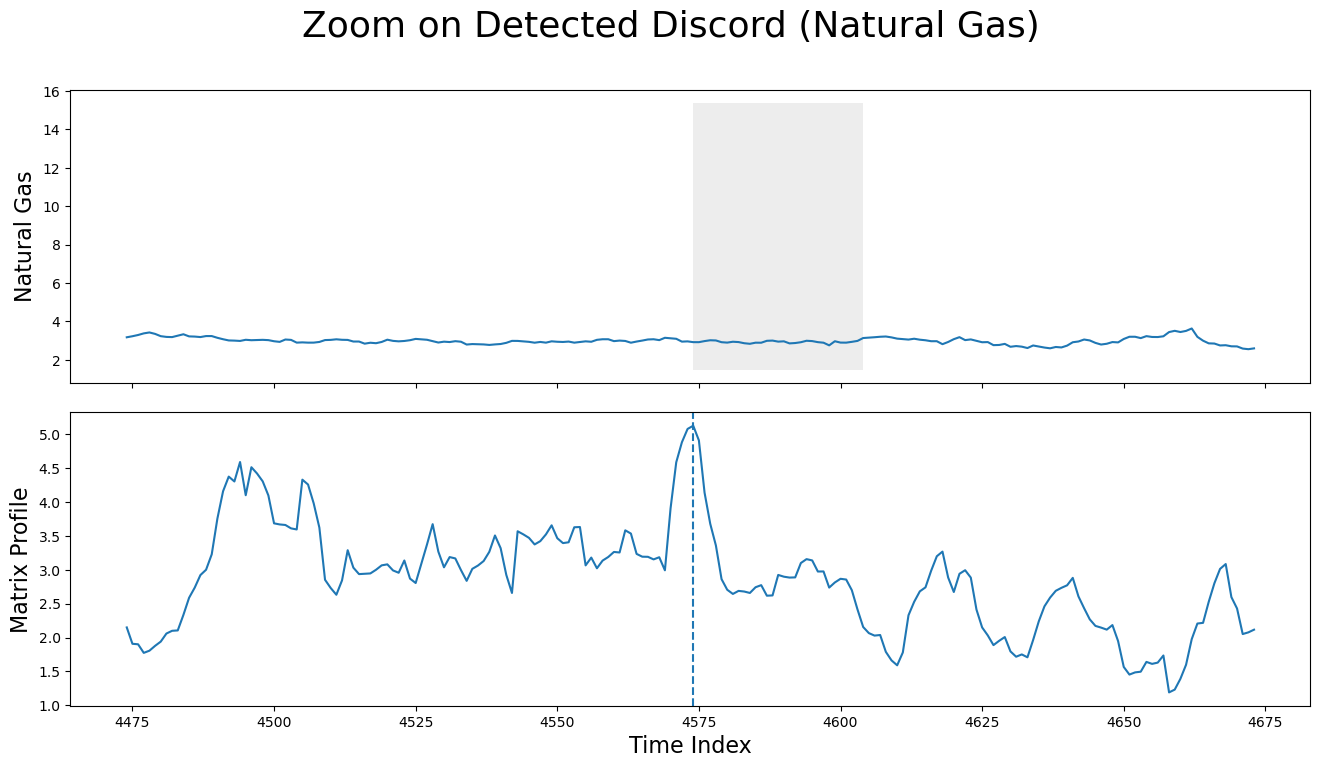


Top 5 discordant subsequences – Natural Gas
 Rank  Index       Date  Discord Score
    1   4574 2017-09-25           5.13
    2   2509 2009-09-28           5.12
    3   2639 2010-03-31           5.01
    4   3107 2012-01-20           4.89
    5   2989 2011-08-05           4.81


In [8]:
# 1. STUMPY : Natural Gas

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

df_cleaned.index = pd.to_datetime(df_cleaned.index)

# We start by selecting the time series (2000 and 2023)
ts = df_cleaned['NATURAL GAS'].dropna().values

# Then we define the subsequence window size
m = 30

# To finally compute the Matrix Profile
mp = stumpy.stump(ts, m)

# To continue we are looking for the largest value of the matrix profile
discord_idx = mp[:, 0].argmax() 
anomaly_date = df_cleaned.index[discord_idx]
print(f"The discord is located at index {discord_idx}, which corresponds to the date: {anomaly_date.strftime('%Y-%m-%d')}")

# And finally plot the matrix profile next to our raw data 
fig, axs = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(df_cleaned['NATURAL GAS'].values)
axs[0].set_ylabel('Natural gas', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.tight_layout()
plt.show()

# To have a better view of the anomalie, we can do a second plot zoomed in on the anomaly zone (±100 days)
zoom_window = 100
start_zoom = max(0, discord_idx - zoom_window)
end_zoom = min(len(ts), discord_idx + zoom_window)
fig_zoom, axs_zoom = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Zoom on Detected Discord (Natural Gas)', fontsize=26)
axs_zoom[0].plot(np.arange(start_zoom, end_zoom), ts[start_zoom:end_zoom])
axs_zoom[0].set_ylabel('Natural Gas', fontsize=16)
zoom_rect = Rectangle((discord_idx, min(ts)), m, max(ts)-min(ts), facecolor='lightgrey', alpha=0.4)
axs_zoom[0].add_patch(zoom_rect)
axs_zoom[1].plot(np.arange(start_zoom, end_zoom), mp[start_zoom:end_zoom, 0])
axs_zoom[1].axvline(x=discord_idx, linestyle="dashed")
axs_zoom[1].set_xlabel('Time Index', fontsize=16)
axs_zoom[1].set_ylabel('Matrix Profile', fontsize=16)
plt.tight_layout()
plt.show()

# In addition, we now extract the 5 most discordant subsequences
def get_top_k_discords(matrix_profile, k, exclusion_zone):
    mp_copy = matrix_profile.copy()
    discords = []
    for _ in range(k):
        idx = np.argmax(mp_copy)
        discords.append(idx)
        mp_copy[max(0, idx - exclusion_zone): min(len(mp_copy), idx + exclusion_zone)] = -np.inf
    return discords

top5_idx = get_top_k_discords(mp[:, 0], k=5, exclusion_zone=m)
top5_dates = [df_cleaned.index[i].strftime('%Y-%m-%d') for i in top5_idx]
top5_scores = [mp[i, 0] for i in top5_idx]

# We wrap everything into a summary table
summary = pd.DataFrame({
    'Rank': [1, 2, 3, 4, 5],
    'Index': top5_idx,
    'Date': top5_dates,
    'Discord Score': np.round(top5_scores, 2)
})

# And finally we print the table
print("\nTop 5 discordant subsequences – Natural Gas")
print(summary.to_string(index=False))

2. **Gold**

The discord is located at index 5351, which corresponds to the date: 2020-09-29


/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/3702369837.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


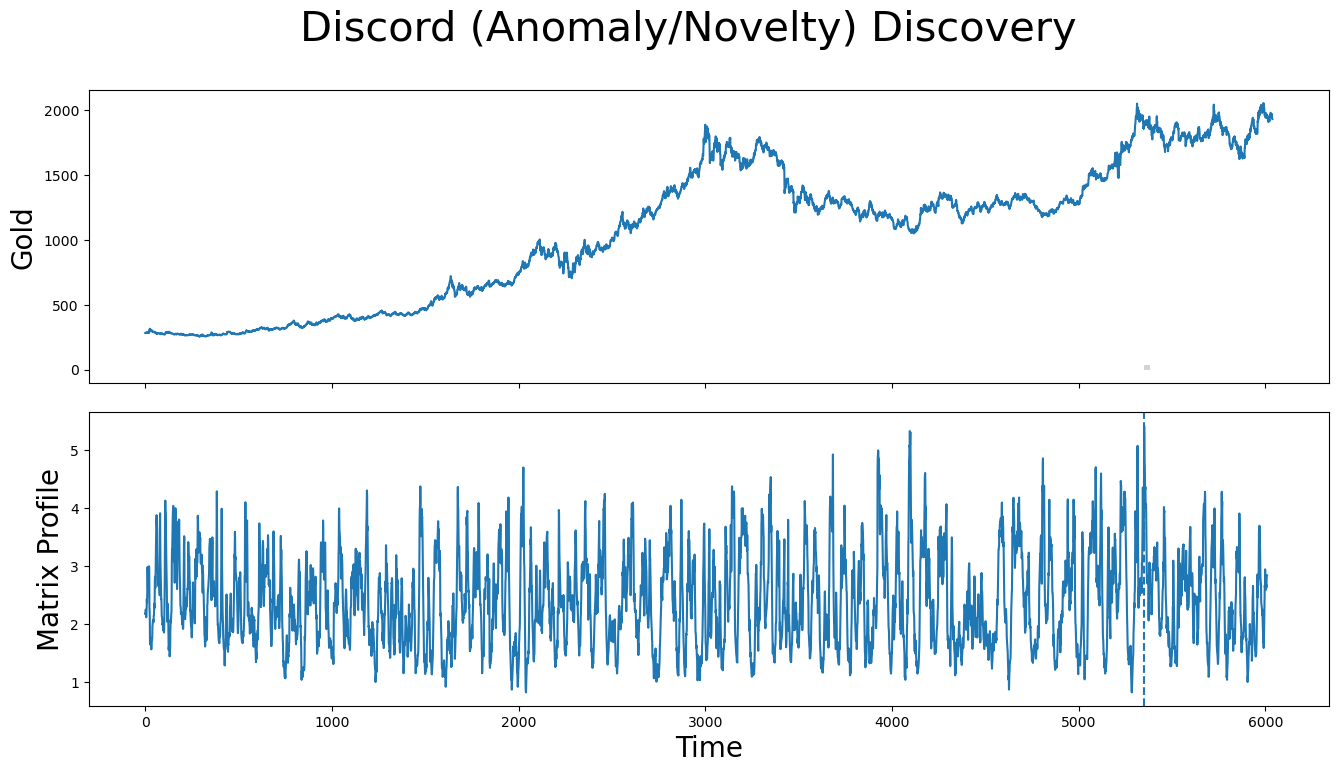

/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/3702369837.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


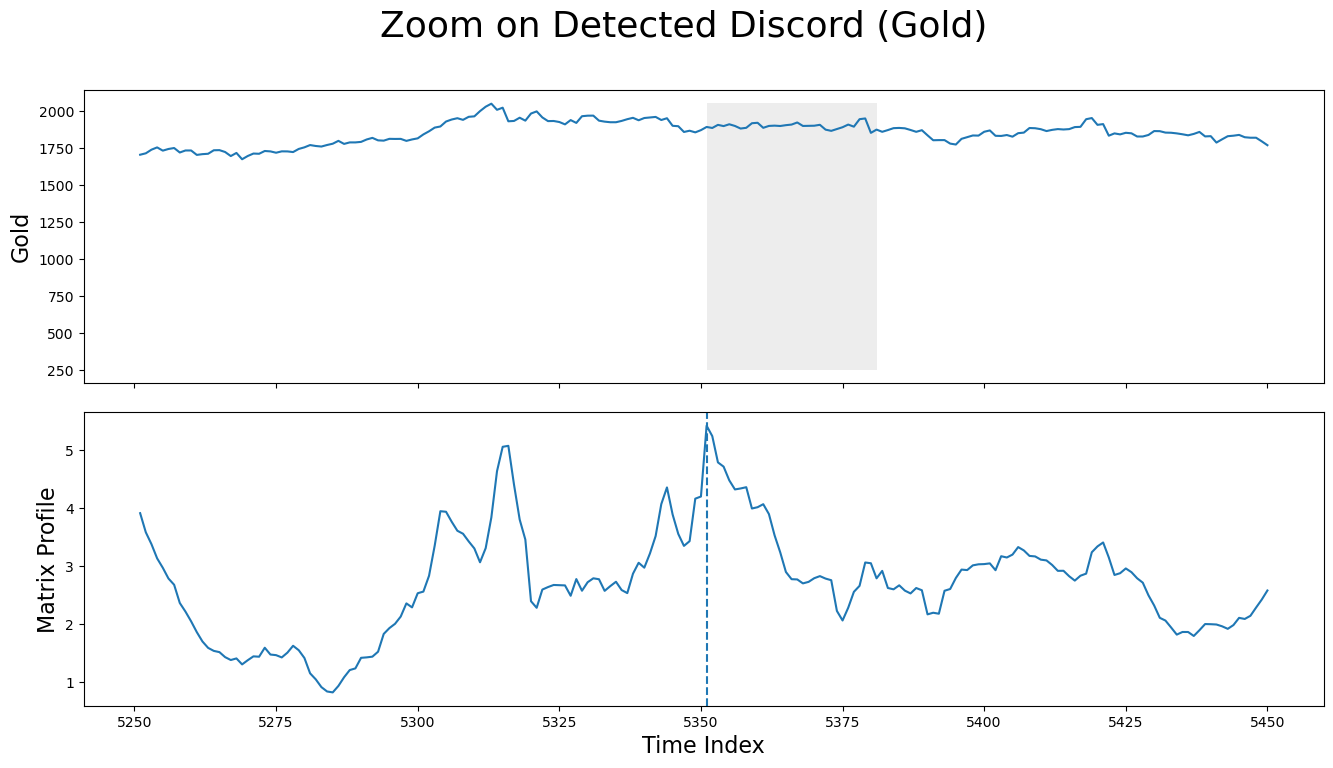


Top 5 discordant subsequences – Gold
 Rank  Index       Date  Discord Score
    1   5351 2020-09-29           5.42
    2   4096 2015-11-18           5.33
    3   5316 2020-08-11           5.07
    4   3926 2015-03-24           4.99
    5   3684 2014-04-15           4.93


In [9]:
# 2. STUMPY : Gold

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

# We start by selecting the time series (2000 and 2023)
ts = df_cleaned['GOLD'].dropna().values

# Then we define the subsequence window size
m = 30

# To finally compute the Matrix Profile
mp = stumpy.stump(ts, m)

# To continue we are looking for the largest value of the matrix profile
discord_idx = mp[:, 0].argmax() 
anomaly_date = df_cleaned.index[discord_idx]
print(f"The discord is located at index {discord_idx}, which corresponds to the date: {anomaly_date.strftime('%Y-%m-%d')}")

# And finally plot the matrix profile next to our raw data 
fig, axs = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(df_cleaned['GOLD'].values)
axs[0].set_ylabel('Gold', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.tight_layout()
plt.show()

# To have a better view of the anomalie, we can do a second plot zoomed in on the anomaly zone (±100 days)
zoom_window = 100
start_zoom = max(0, discord_idx - zoom_window)
end_zoom = min(len(ts), discord_idx + zoom_window)
fig_zoom, axs_zoom = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Zoom on Detected Discord (Gold)', fontsize=26)
axs_zoom[0].plot(np.arange(start_zoom, end_zoom), ts[start_zoom:end_zoom])
axs_zoom[0].set_ylabel('Gold', fontsize=16)
zoom_rect = Rectangle((discord_idx, min(ts)), m, max(ts)-min(ts), facecolor='lightgrey', alpha=0.4)
axs_zoom[0].add_patch(zoom_rect)
axs_zoom[1].plot(np.arange(start_zoom, end_zoom), mp[start_zoom:end_zoom, 0])
axs_zoom[1].axvline(x=discord_idx, linestyle="dashed")
axs_zoom[1].set_xlabel('Time Index', fontsize=16)
axs_zoom[1].set_ylabel('Matrix Profile', fontsize=16)
plt.tight_layout()
plt.show()

# In addition, we now extract the 5 most discordant subsequences
def get_top_k_discords(matrix_profile, k, exclusion_zone):
    mp_copy = matrix_profile.copy()
    discords = []
    for _ in range(k):
        idx = np.argmax(mp_copy)
        discords.append(idx)
        mp_copy[max(0, idx - exclusion_zone): min(len(mp_copy), idx + exclusion_zone)] = -np.inf
    return discords

top5_idx = get_top_k_discords(mp[:, 0], k=5, exclusion_zone=m)
top5_dates = [df_cleaned.index[i].strftime('%Y-%m-%d') for i in top5_idx]
top5_scores = [mp[i, 0] for i in top5_idx]

# We wrap everything into a summary table
summary = pd.DataFrame({
    'Rank': [1, 2, 3, 4, 5],
    'Index': top5_idx,
    'Date': top5_dates,
    'Discord Score': np.round(top5_scores, 2)
})

# And finally we print the table
print("\nTop 5 discordant subsequences – Gold")
print(summary.to_string(index=False))

3. **Brent Crude**

The discord is located at index 2523, which corresponds to the date: 2009-10-16


/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/2370834371.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


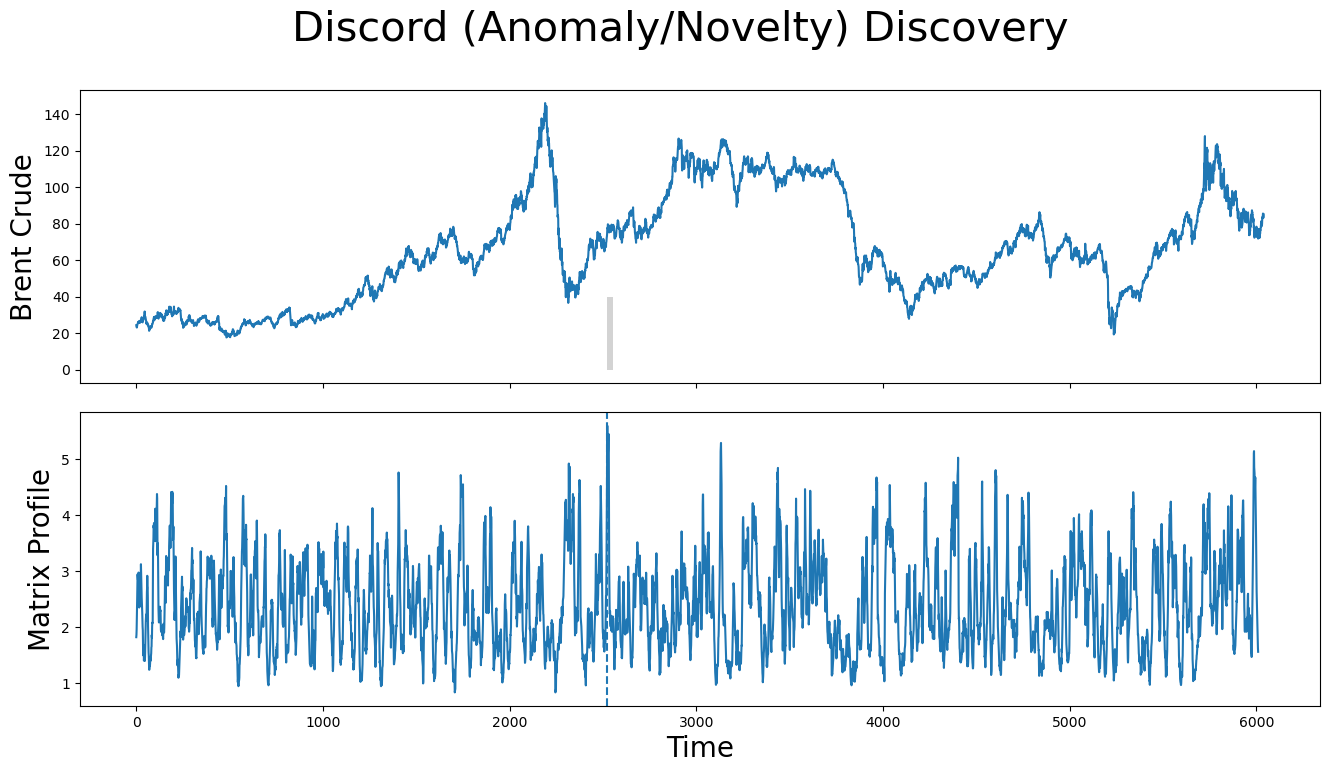

/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/2370834371.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


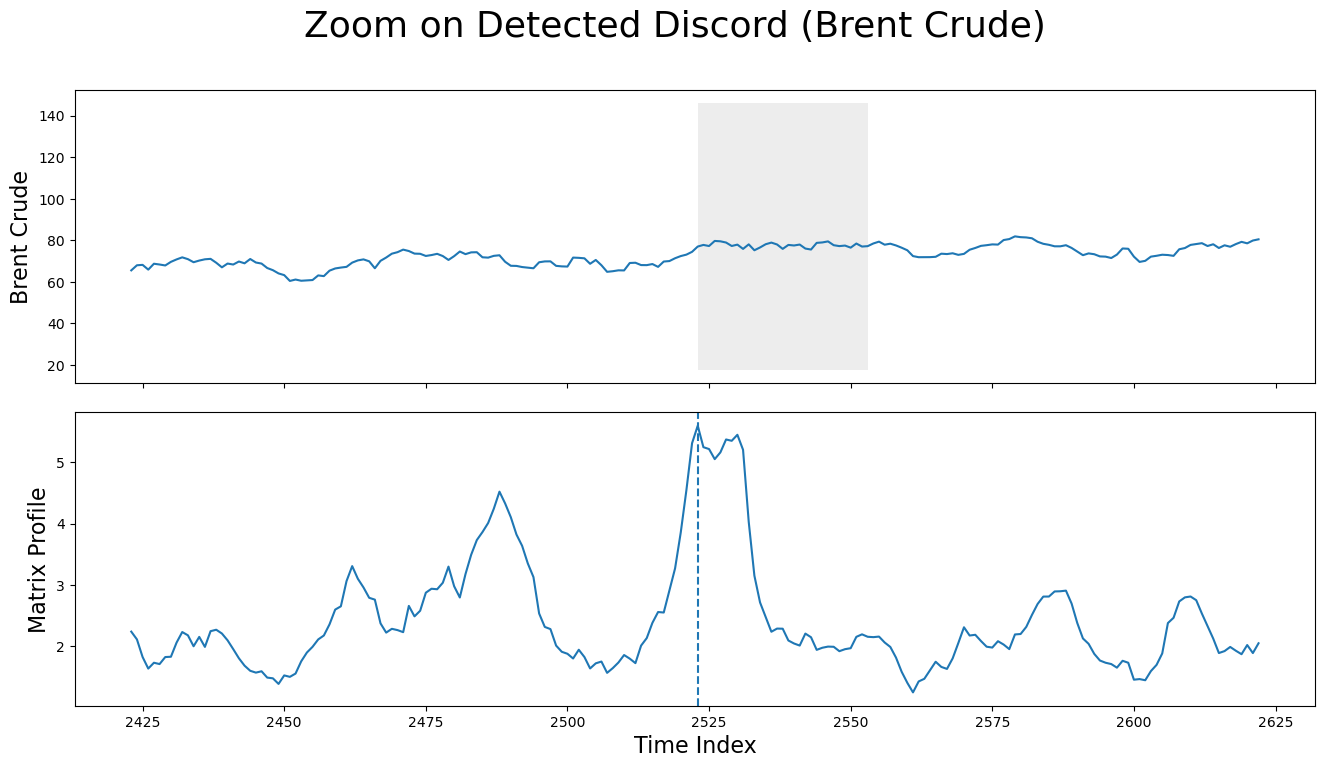


Top 5 discordant subsequences – Brent Crude
 Rank  Index       Date  Discord Score
    1   2523 2009-10-16           5.60
    2   3132 2012-02-24           5.29
    3   5987 2023-04-27           5.14
    4   4402 2017-01-25           5.03
    5   2317 2008-12-30           4.92


In [10]:
# 3. STUMPY : Brent Crude

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

# We start by selecting the time series (2000 and 2023)
ts = df_cleaned['BRENT CRUDE'].dropna().values

# Then we define the subsequence window size
m = 30

# To finally compute the Matrix Profile
mp = stumpy.stump(ts, m)

# To continue we are looking for the largest value of the matrix profile
discord_idx = mp[:, 0].argmax() 
anomaly_date = df_cleaned.index[discord_idx]
print(f"The discord is located at index {discord_idx}, which corresponds to the date: {anomaly_date.strftime('%Y-%m-%d')}")

# And finally plot the matrix profile next to our raw data 
fig, axs = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(df_cleaned['BRENT CRUDE'].values)
axs[0].set_ylabel('Brent Crude', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.tight_layout()
plt.show()

# To have a better view of the anomalie, we can do a second plot zoomed in on the anomaly zone (±100 days)
zoom_window = 100
start_zoom = max(0, discord_idx - zoom_window)
end_zoom = min(len(ts), discord_idx + zoom_window)
fig_zoom, axs_zoom = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Zoom on Detected Discord (Brent Crude)', fontsize=26)
axs_zoom[0].plot(np.arange(start_zoom, end_zoom), ts[start_zoom:end_zoom])
axs_zoom[0].set_ylabel('Brent Crude', fontsize=16)
zoom_rect = Rectangle((discord_idx, min(ts)), m, max(ts)-min(ts), facecolor='lightgrey', alpha=0.4)
axs_zoom[0].add_patch(zoom_rect)
axs_zoom[1].plot(np.arange(start_zoom, end_zoom), mp[start_zoom:end_zoom, 0])
axs_zoom[1].axvline(x=discord_idx, linestyle="dashed")
axs_zoom[1].set_xlabel('Time Index', fontsize=16)
axs_zoom[1].set_ylabel('Matrix Profile', fontsize=16)
plt.tight_layout()
plt.show()

# In addition, we now extract the 5 most discordant subsequences
def get_top_k_discords(matrix_profile, k, exclusion_zone):
    mp_copy = matrix_profile.copy()
    discords = []
    for _ in range(k):
        idx = np.argmax(mp_copy)
        discords.append(idx)
        mp_copy[max(0, idx - exclusion_zone): min(len(mp_copy), idx + exclusion_zone)] = -np.inf
    return discords

top5_idx = get_top_k_discords(mp[:, 0], k=5, exclusion_zone=m)
top5_dates = [df_cleaned.index[i].strftime('%Y-%m-%d') for i in top5_idx]
top5_scores = [mp[i, 0] for i in top5_idx]

# We wrap everything into a summary table
summary = pd.DataFrame({
    'Rank': [1, 2, 3, 4, 5],
    'Index': top5_idx,
    'Date': top5_dates,
    'Discord Score': np.round(top5_scores, 2)
})

# And finally we print the table
print("\nTop 5 discordant subsequences – Brent Crude")
print(summary.to_string(index=False))

4. **Aluminium**

The discord is located at index 5397, which corresponds to the date: 2020-12-02


/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/573163984.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


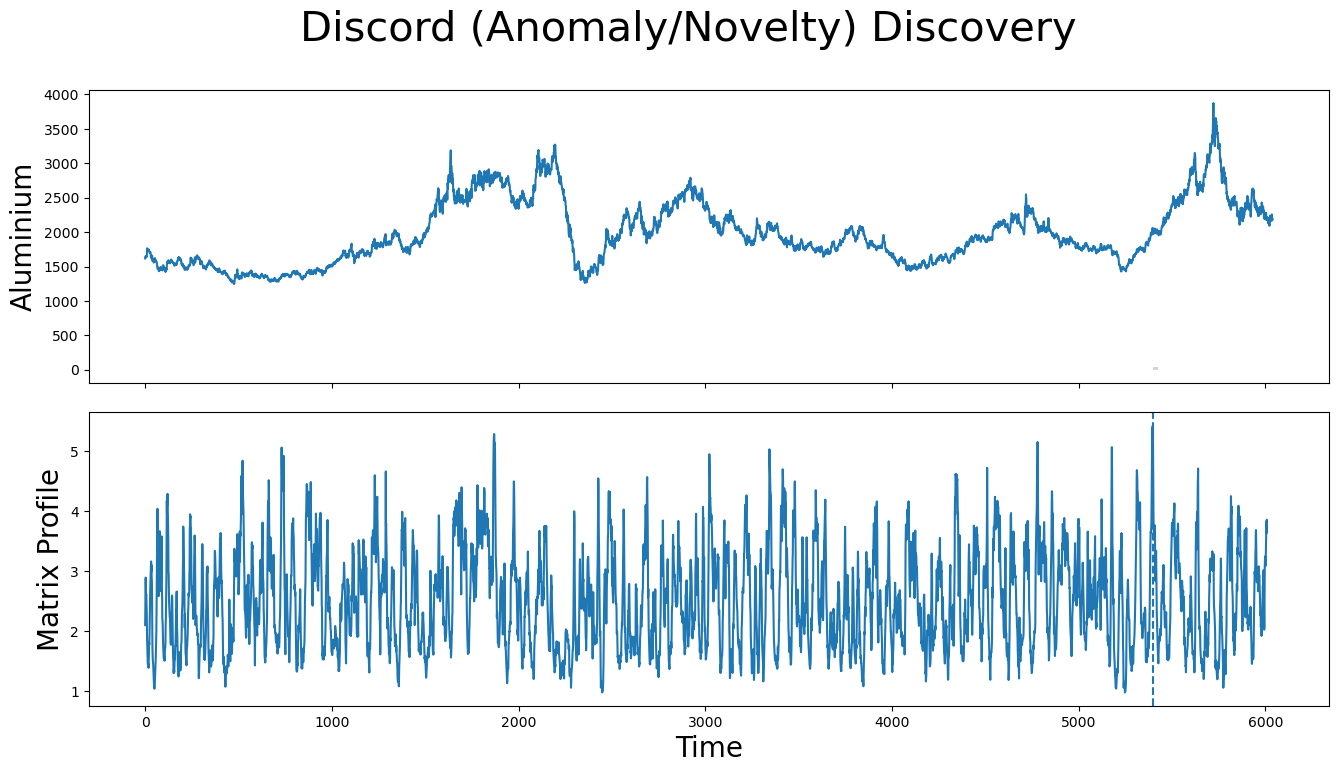

/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/573163984.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


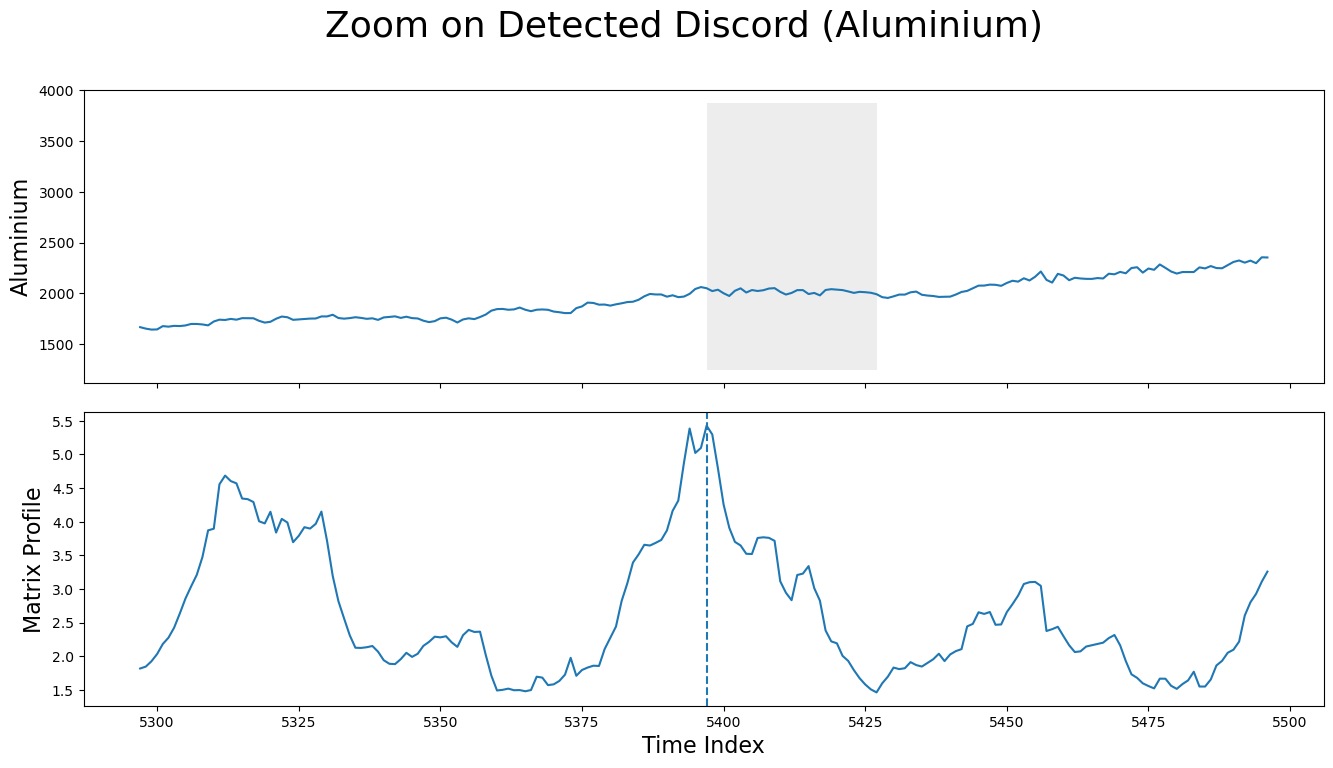


Top 5 discordant subsequences – Aluminium
 Rank  Index       Date  Discord Score
    1   5397 2020-12-02           5.43
    2   1869 2007-04-05           5.29
    3   4780 2018-07-13           5.16
    4   5178 2020-01-29           5.07
    5    731 2002-11-01           5.06


In [11]:
# 4. STUMPY : Aluminium

ts = df_cleaned['ALUMINIUM'].dropna().values
m = 30
mp = stumpy.stump(ts, m)
discord_idx = mp[:, 0].argmax() 
anomaly_date = df_cleaned.index[discord_idx]
print(f"The discord is located at index {discord_idx}, which corresponds to the date: {anomaly_date.strftime('%Y-%m-%d')}")

fig, axs = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')
axs[0].plot(df_cleaned['ALUMINIUM'].values)
axs[0].set_ylabel('Aluminium', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.tight_layout()
plt.show()

zoom_window = 100
start_zoom = max(0, discord_idx - zoom_window)
end_zoom = min(len(ts), discord_idx + zoom_window)
fig_zoom, axs_zoom = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Zoom on Detected Discord (Aluminium)', fontsize=26)
axs_zoom[0].plot(np.arange(start_zoom, end_zoom), ts[start_zoom:end_zoom])
axs_zoom[0].set_ylabel('Aluminium', fontsize=16)
zoom_rect = Rectangle((discord_idx, min(ts)), m, max(ts)-min(ts), facecolor='lightgrey', alpha=0.4)
axs_zoom[0].add_patch(zoom_rect)
axs_zoom[1].plot(np.arange(start_zoom, end_zoom), mp[start_zoom:end_zoom, 0])
axs_zoom[1].axvline(x=discord_idx, linestyle="dashed")
axs_zoom[1].set_xlabel('Time Index', fontsize=16)
axs_zoom[1].set_ylabel('Matrix Profile', fontsize=16)
plt.tight_layout()
plt.show()

def get_top_k_discords(matrix_profile, k, exclusion_zone):
    mp_copy = matrix_profile.copy()
    discords = []
    for _ in range(k):
        idx = np.argmax(mp_copy)
        discords.append(idx)
        mp_copy[max(0, idx - exclusion_zone): min(len(mp_copy), idx + exclusion_zone)] = -np.inf
    return discords

top5_idx = get_top_k_discords(mp[:, 0], k=5, exclusion_zone=m)
top5_dates = [df_cleaned.index[i].strftime('%Y-%m-%d') for i in top5_idx]
top5_scores = [mp[i, 0] for i in top5_idx]

summary = pd.DataFrame({
    'Rank': [1, 2, 3, 4, 5],
    'Index': top5_idx,
    'Date': top5_dates,
    'Discord Score': np.round(top5_scores, 2)
})
print("\nTop 5 discordant subsequences – Aluminium")
print(summary.to_string(index=False))

5. **Wheat**

The discord is located at index 3417, which corresponds to the date: 2013-04-03


/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/708072406.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


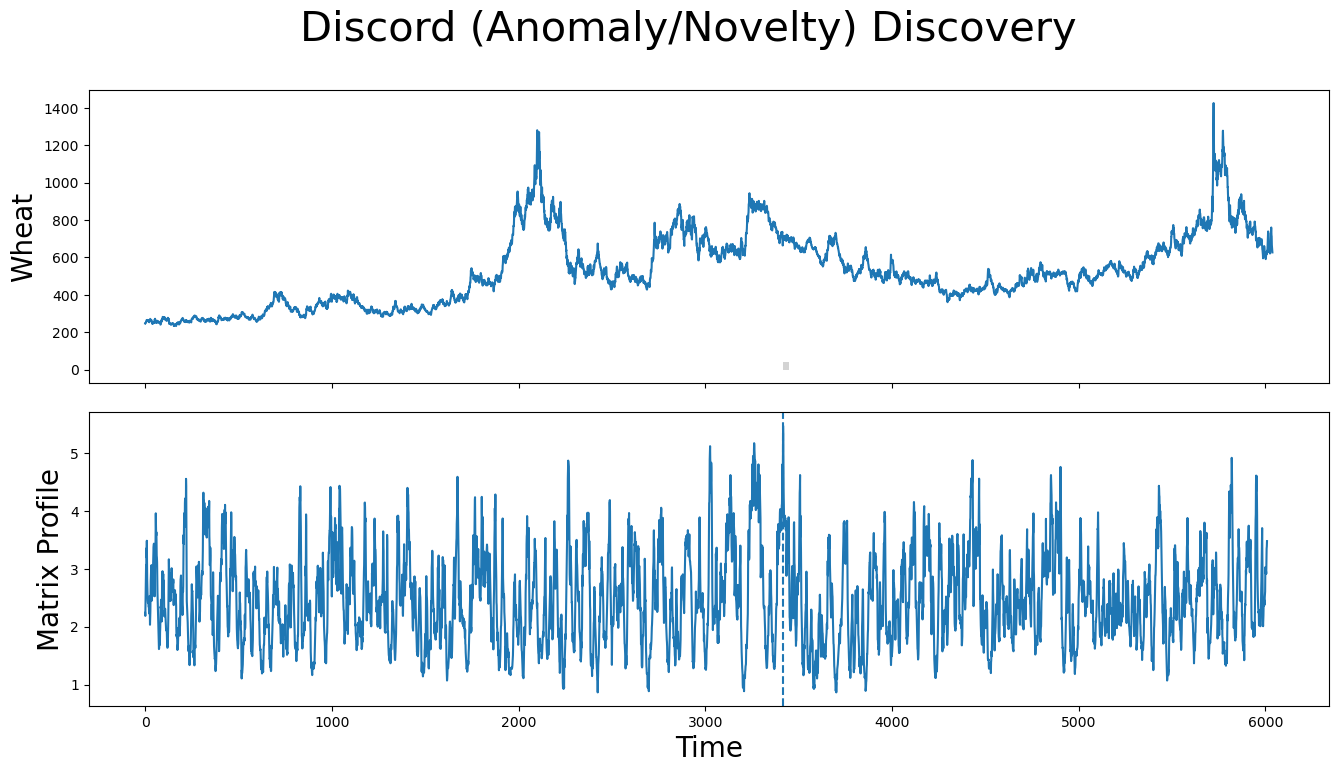

/var/folders/2n/7shnmgbs68l1fjkxm09qn_r40000gn/T/ipykernel_67697/708072406.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


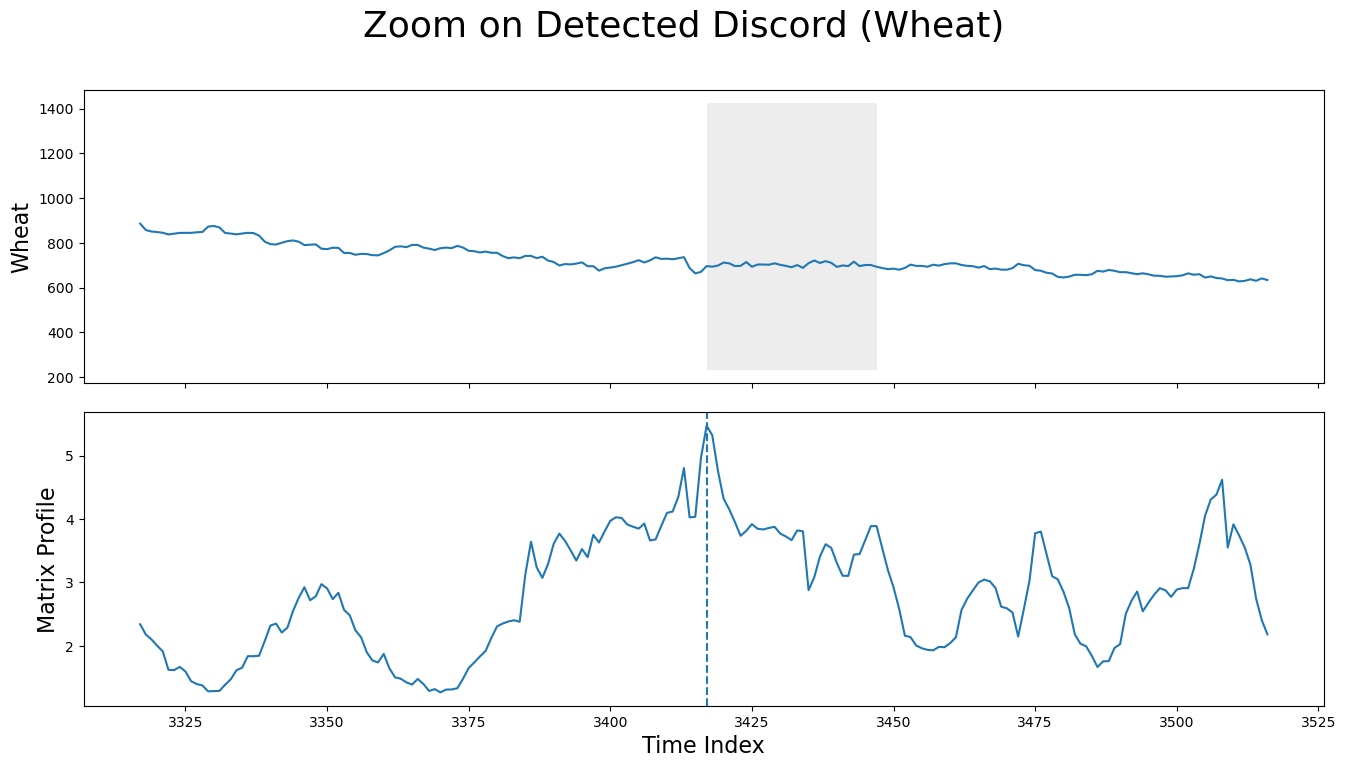


Top 5 discordant subsequences – Wheat
 Rank  Index       Date  Discord Score
    1   3417 2013-04-03           5.47
    2   3262 2012-08-24           5.17
    3   3026 2011-09-27           5.12
    4   5820 2022-07-21           4.91
    5   4432 2017-03-08           4.88


In [12]:
# 5. STUMPY : Wheat

ts = df_cleaned['WHEAT'].dropna().values
m = 30
mp = stumpy.stump(ts, m)
discord_idx = mp[:, 0].argmax() 
anomaly_date = df_cleaned.index[discord_idx]
print(f"The discord is located at index {discord_idx}, which corresponds to the date: {anomaly_date.strftime('%Y-%m-%d')}")

fig, axs = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')
axs[0].plot(df_cleaned['WHEAT'].values)
axs[0].set_ylabel('Wheat', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.tight_layout()
plt.show()

zoom_window = 100
start_zoom = max(0, discord_idx - zoom_window)
end_zoom = min(len(ts), discord_idx + zoom_window)
fig_zoom, axs_zoom = plt.subplots(2, sharex=True, figsize=(16, 8), gridspec_kw={'hspace': 0.1})
plt.suptitle('Zoom on Detected Discord (Wheat)', fontsize=26)
axs_zoom[0].plot(np.arange(start_zoom, end_zoom), ts[start_zoom:end_zoom])
axs_zoom[0].set_ylabel('Wheat', fontsize=16)
zoom_rect = Rectangle((discord_idx, min(ts)), m, max(ts)-min(ts), facecolor='lightgrey', alpha=0.4)
axs_zoom[0].add_patch(zoom_rect)
axs_zoom[1].plot(np.arange(start_zoom, end_zoom), mp[start_zoom:end_zoom, 0])
axs_zoom[1].axvline(x=discord_idx, linestyle="dashed")
axs_zoom[1].set_xlabel('Time Index', fontsize=16)
axs_zoom[1].set_ylabel('Matrix Profile', fontsize=16)
plt.tight_layout()
plt.show()

def get_top_k_discords(matrix_profile, k, exclusion_zone):
    mp_copy = matrix_profile.copy()
    discords = []
    for _ in range(k):
        idx = np.argmax(mp_copy)
        discords.append(idx)
        mp_copy[max(0, idx - exclusion_zone): min(len(mp_copy), idx + exclusion_zone)] = -np.inf
    return discords

top5_idx = get_top_k_discords(mp[:, 0], k=5, exclusion_zone=m)
top5_dates = [df_cleaned.index[i].strftime('%Y-%m-%d') for i in top5_idx]
top5_scores = [mp[i, 0] for i in top5_idx]

summary = pd.DataFrame({
    'Rank': [1, 2, 3, 4, 5],
    'Index': top5_idx,
    'Date': top5_dates,
    'Discord Score': np.round(top5_scores, 2)
})
print("\nTop 5 discordant subsequences – Wheat")
print(summary.to_string(index=False))

**Question 2 : Forecasting**

**Client Context:**
Each year, an affiliate of The Coca-Cola Company needs to procure 30,000 tons of aluminium (to produce 2 billion cans) and obtain around 20,000 MWh of energy by buying Brent-derived fuel to power its melting furnaces and rolling mills. Given the high volatility of the commodities market, the CFO wanted to put in place an effective hedging strategy to protect his margins on the futures markets.

**Case Question:**
Can you draw up a price forecast for aluminium and Brent crude oil for the coming months, to determine whether or not the CFO should protect himself against a potential rise in these commodities?

**Introduction**

To answer this question, we will first stabilise the yields of these two raw materials (one after the other) using a log transformation. Then we will make the series stationary by differencing the log-transformed data. From there, we can build the ARIMA model, analyse the results and finally make our forecast to answer the question.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            BRENT CRUDE   No. Observations:                 6038
Model:                 ARIMA(1, 0, 1)   Log Likelihood                9198.270
Date:                Fri, 27 Jun 2025   AIC                         -18388.539
Time:                        00:50:07   BIC                         -18361.716
Sample:                             0   HQIC                        -18379.228
                               - 6038                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.493      0.622      -0.001       0.002
ar.L1         -0.7773      0.036    -21.713      0.000      -0.847      -0.707
ma.L1          0.8045      0.035     23.143      0.0

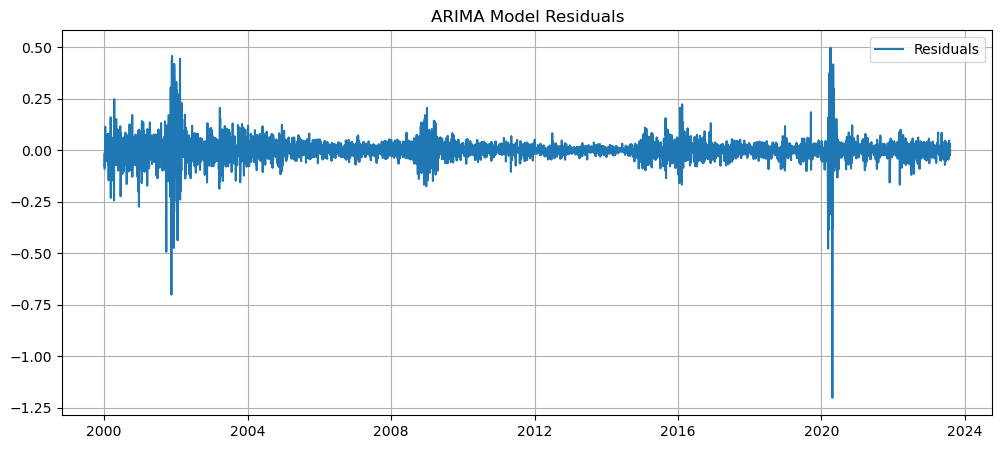

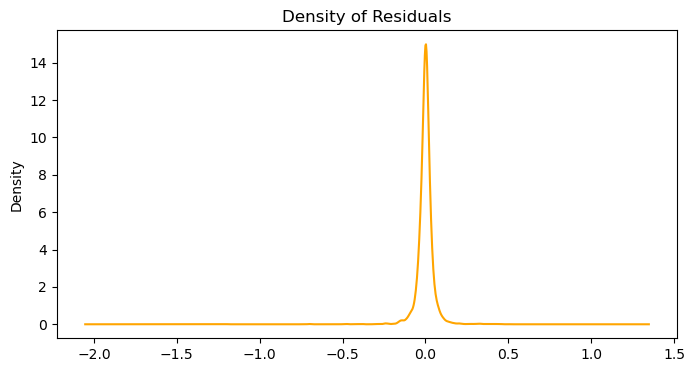

count    6038.000000
mean        0.000005
std         0.052747
min        -1.202498
25%        -0.016950
50%         0.001053
75%         0.018051
max         0.497374
dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


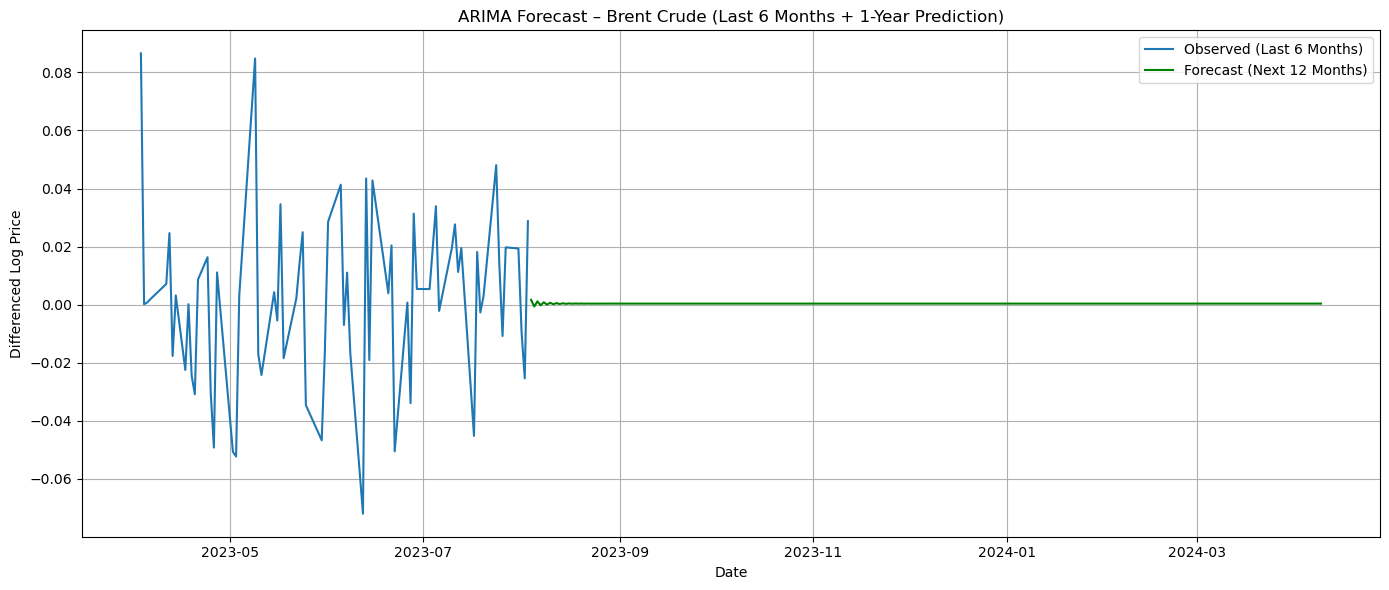

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# First, we extract the Brent Crude price series from our cleaned DataFrame
brent_series = df_cleaned['BRENT CRUDE'].dropna()
brent_series.index = pd.to_datetime(brent_series.index)

# Then, we apply a log transformation to stabilize the variance and avoid negative values
log_brent = np.log(brent_series - brent_series.min() + 1)

# Finally, we make the series stationary by differencing the log-transformed data
diff_log_brent = log_brent.diff().dropna()

# To continue, we fit an ARIMA(1,0,1) model to the stationary data
model = ARIMA(diff_log_brent, order=(1, 0, 1))
model_fit = model.fit()

# Next, we look at the model summary to check parameters and fit quality
print(model_fit.summary())

# Finally, we plot the residuals to see if they behave like white noise
residuals = model_fit.resid
plt.figure(figsize=(12,5))
plt.plot(residuals, label='Residuals')
plt.title('ARIMA Model Residuals')
plt.grid(True)
plt.legend()
plt.show()

# Now, we examine the distribution of residuals for normality
residuals.plot(kind='kde', title='Density of Residuals', figsize=(8,4), color='orange')
plt.show()

# Then, we print out descriptive statistics of the residuals
print(residuals.describe())

# Next, we forecast the next 250 trading days of differenced log prices
diff_log_brent.index = pd.to_datetime(diff_log_brent.index)
forecast = model_fit.forecast(steps=250)

last_6_months = diff_log_brent[diff_log_brent.index >= diff_log_brent.index.max() - pd.Timedelta(days=125)]
forecast_start = diff_log_brent.index.max() + pd.Timedelta(days=1)
forecast_index = pd.date_range(start=forecast_start, periods=250, freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_index)

# Finally, we visualize the last 6 months of data alongside the 12-month forecast
plt.figure(figsize=(14, 6))
plt.plot(last_6_months, label='Observed (Last 6 Months)')
plt.plot(forecast_series, label='Forecast (Next 12 Months)', color='green')
plt.title('ARIMA Forecast – Brent Crude (Last 6 Months + 1-Year Prediction)')
plt.xlabel('Date')
plt.ylabel('Differenced Log Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              ALUMINIUM   No. Observations:                 6038
Model:                 ARIMA(1, 0, 1)   Log Likelihood                6560.582
Date:                Fri, 27 Jun 2025   AIC                         -13113.163
Time:                        00:50:08   BIC                         -13086.340
Sample:                             0   HQIC                        -13103.851
                               - 6038                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.158      0.874      -0.002       0.002
ar.L1          0.7932      0.008    104.938      0.000       0.778       0.808
ma.L1         -0.8683      0.007   -129.411      0.0

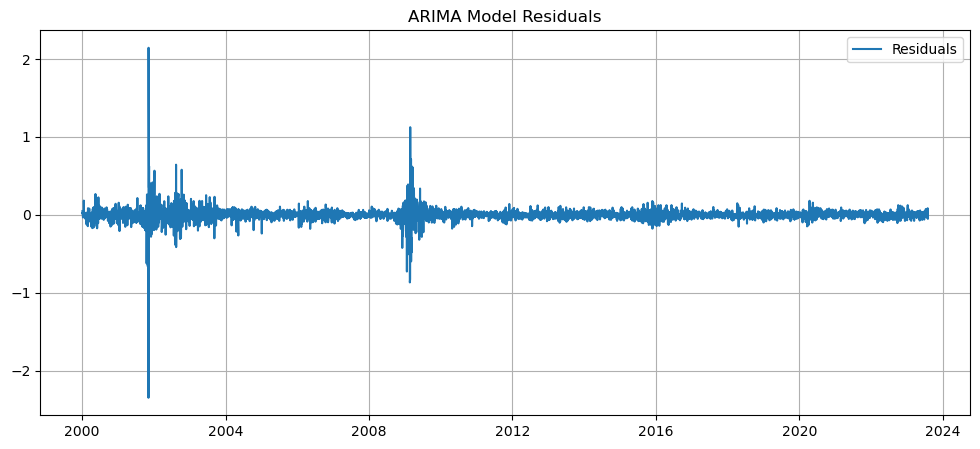

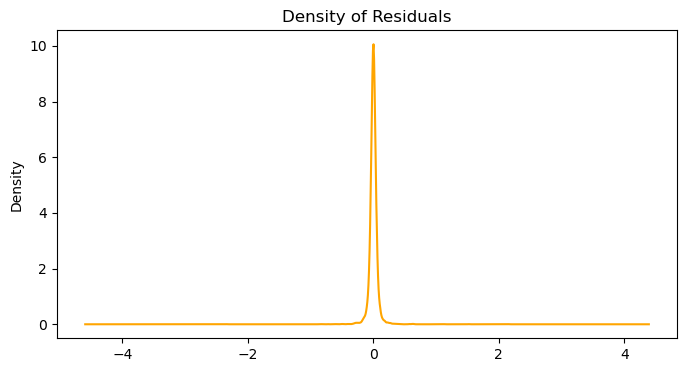

count    6038.000000
mean        0.000018
std         0.081642
min        -2.346759
25%        -0.025203
50%         0.000023
75%         0.025467
max         2.143703
dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


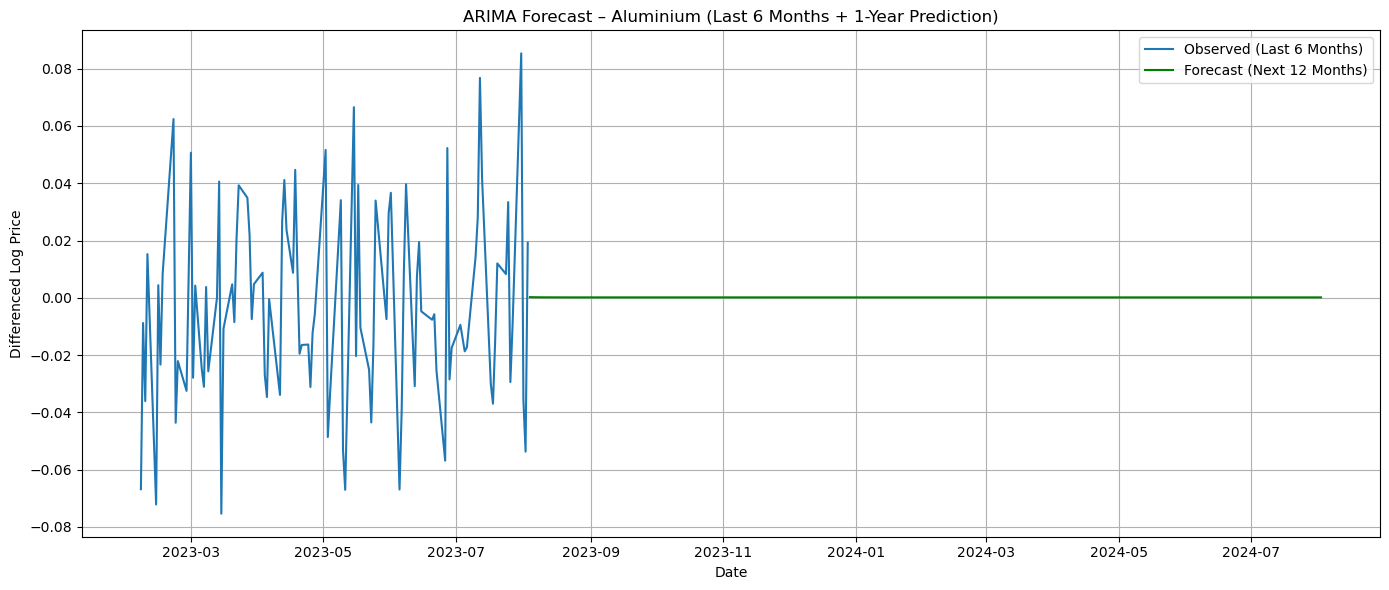

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# First, we extract the Aluminium price series from our cleaned DataFrame
aluminium_series = df_cleaned['ALUMINIUM'].dropna()
aluminium_series.index = pd.to_datetime(aluminium_series.index)

# Then, we apply a log transformation to stabilize the variance and avoid negative values
log_aluminium = np.log(aluminium_series - aluminium_series.min() + 1)

# Finally, we make the series stationary by differencing the log-transformed data
diff_log_aluminium = log_aluminium.diff().dropna()


# To continue, we fit an ARIMA(1,0,1) model to the stationary data
model = ARIMA(diff_log_aluminium, order=(1, 0, 1))
model_fit = model.fit()

# Next, we look at the model summary to check parameters and fit quality
print(model_fit.summary())

# Finally, we plot the residuals to see if they behave like white noise
residuals = model_fit.resid
plt.figure(figsize=(12,5))
plt.plot(residuals, label='Residuals')
plt.title('ARIMA Model Residuals')
plt.grid(True)
plt.legend()
plt.show()

# Now, we examine the distribution of residuals for normality
residuals.plot(kind='kde', title='Density of Residuals', figsize=(8,4), color='orange')
plt.show()

# Then, we print out descriptive statistics of the residuals
print(residuals.describe())

# Next, we forecast the next 365 days of differenced log prices
forecast = model_fit.forecast(steps=365)
diff_log_aluminium.index = pd.to_datetime(diff_log_aluminium.index)
last_6_months = diff_log_aluminium[diff_log_aluminium.index >= diff_log_aluminium.index.max() - pd.Timedelta(days=180)]
forecast_index = pd.date_range(start=diff_log_aluminium.index.max() + pd.Timedelta(days=1), periods=365, freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_index)

# Finally, we visualize the last 6 months of data alongside the 12-month forecast
plt.figure(figsize=(14, 6))
plt.plot(last_6_months, label='Observed (Last 6 Months)')
plt.plot(forecast_series, label='Forecast (Next 12 Months)', color='green')
plt.title('ARIMA Forecast – Aluminium (Last 6 Months + 1-Year Prediction)')
plt.xlabel('Date')
plt.ylabel('Differenced Log Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**ANSWER :** 

Having made our forecasts using the ARIMA method, we note that the predicted future returns for aluminium and Brent Crude are very close to zero, which means that we are not predicting any major change in the price of these commodities.
Our advice to the CFO of this company would therefore be not to hedge against a rise in Brent Crude and aluminium.

**<u>Appendice : Use of ChatGPT<u>**

ChatGPT has been used for the following tasks: 
- Code assistance to debug and find solutions to problems
- Idea generation to support our analyses (graphs, visualisations, etc.)
- Translation tool